Kodların Temiz Çalışması ve gereksi uyarıların engellenmesini sağlamak amaçlı eklendi.

In [81]:
import warnings; 
warnings.simplefilter('ignore')

Pandas kütüphanesi import edildi

In [92]:
import pandas as pd
from prophet import Prophet

Data dosyamızın sistem tarafından okunması sağlandı.

In [122]:
df = pd.read_csv('data_nn.csv')
df.head()

,gun,value
0,1032000,3634516
1,1052000,3388016
2,1072000,3683338
3,1092000,4464631
4,1112000,3637225


In [123]:
df['Year'] = df['gun'].apply(lambda x: str(x)[-4:])
df['Month'] = df['gun'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['gun'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])

In [132]:
df.head()

,y,ds
0,3634516,2000-03-01
1,3388016,2000-05-01
2,3683338,2000-07-01
3,4464631,2000-09-01
4,3637225,2000-11-01


Bu aşamada veri tipi dönüşümü sağlandı.DataFrame belirli biçimi olmalıdır. İlk sütun ds adına sahip olmalı ve tarih-saatleri içermelidir. İkinci sütun y adına sahip olmalı ve gözlemleri içermelidir.

In [124]:
df = df.loc[(df['value']!='')]
df.drop(['gun', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']

Datalar sisteme uygun hale getirildi.

Oluşturduğumuz df tablosu çağırıldı.

In [127]:
df.head()

,y,ds
0,3634516,2000-03-01
1,3388016,2000-05-01
2,3683338,2000-07-01
3,4464631,2000-09-01
4,3637225,2000-11-01


Prophet sınıfından bir nesne oluşturuluyor ve interval_width parametresi 0.95, daily_seasonality parametresi True olarak belirleniyor. Bu, modelin belirli bir güven aralığı içinde tahmin yapmasını ve günlük mevsimsellik özelliklerini içermesini sağlar.Oluşturulan Prophet nesnesi (m), fit metodu kullanılarak veri çerçevesi (df) üzerinde eğitiliyor. Model, veri çerçevesindeki zaman serisi verilerini kullanarak trendleri ve mevsimsel desenleri öğrenir.

In [128]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

05:32:01 - cmdstanpy - INFO - Chain [1] start processing
05:32:02 - cmdstanpy - INFO - Chain [1] done processing


make_future_dataframe: Bu metod, gelecekteki zaman noktalarını içeren bir veri çerçevesi oluşturur. periods parametresi, kaç adet gelecekteki zaman noktasını oluşturmak istediğinizi belirler. freq parametresi ise bu zaman noktalarının frekansını belirler. Örneğin, 'D' (Day) frekansı gün bazında bir zaman serisi oluşturur.predict: Bu metod, gelecekteki zaman noktaları için tahmin yapar. make_future_dataframe metodundan elde edilen gelecekteki zaman noktalarını içeren veri çerçevesini kullanarak model, gelecekteki değerleri tahmin eder.forecast.head(): Bu kod, tahmin edilen değerlerin ilk birkaç satırını gösterir. forecast değişkeni, gelecekteki zaman noktaları için yapılan tahminleri içeren bir Pandas DataFrame'dir.

In [129]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-03-01,3.503676e+06,-4.356779e+06,7.149217e+06,3.503676e+06,3.503676e+06,-2.072561e+06,-2.072561e+06,-2.072561e+06,-508233.183816,-508233.183816,-508233.183816,-1.564328e+06,-1.564328e+06,-1.564328e+06,0.0,0.0,0.0,1.431115e+06
1,2000-05-01,3.562154e+06,-3.748897e+06,7.236901e+06,3.562154e+06,3.562154e+06,-1.717039e+06,-1.717039e+06,-1.717039e+06,-508233.183816,-508233.183816,-508233.183816,-1.208806e+06,-1.208806e+06,-1.208806e+06,0.0,0.0,0.0,1.845115e+06
2,2000-07-01,3.620633e+06,-6.384300e+05,1.012957e+07,3.620633e+06,3.620633e+06,1.011268e+06,1.011268e+06,1.011268e+06,-508233.183816,-508233.183816,-508233.183816,1.519501e+06,1.519501e+06,1.519501e+06,0.0,0.0,0.0,4.631900e+06
3,2000-09-01,3.680069e+06,-1.794711e+06,9.022547e+06,3.680069e+06,3.680069e+06,-7.069732e+04,-7.069732e+04,-7.069732e+04,-508233.183816,-508233.183816,-508233.183816,4.375359e+05,4.375359e+05,4.375359e+05,0.0,0.0,0.0,3.609372e+06
4,2000-11-01,3.738548e+06,-1.951596e+06,9.445227e+06,3.738548e+06,3.738548e+06,-5.104318e+04,-5.104318e+04,-5.104318e+04,-508233.183816,-508233.183816,-508233.183816,4.571900e+05,4.571900e+05,4.571900e+05,0.0,0.0,0.0,3.687505e+06


Bu kod satırı, Prophet modeli üzerinde eğitilen bir modelin ve bu modelin tahmin ettiği gelecekteki değerlerin bir grafiğini çizmek için kullanılır. Bu grafiği oluşturmak için plot metodu kullanılır.

Aşağıda, plot1 değişkeni üzerinden oluşturulan grafiği gösteren birkaç açıklama yer almaktadır:

m: Prophet modeli.
forecast: predict metodundan elde edilen tahmin sonuçları.
Bu grafiğin üzerinde genellikle iki ana bileşen bulunur:

Siyah Noktalar (Original Veri): Gerçek zaman serisi verisinin noktalarını temsil eder. Bu noktalar, eğitim veri setinden gelir ve modelin bu veri setine ne kadar iyi uyduğunu gösterir.

Mavi Çizgi (Tahmin): Modelin gelecekteki zaman noktaları için yaptığı tahminleri temsil eder. Bu çizgi, trendleri, mevsimsel desenleri ve diğer özellikleri içerir.

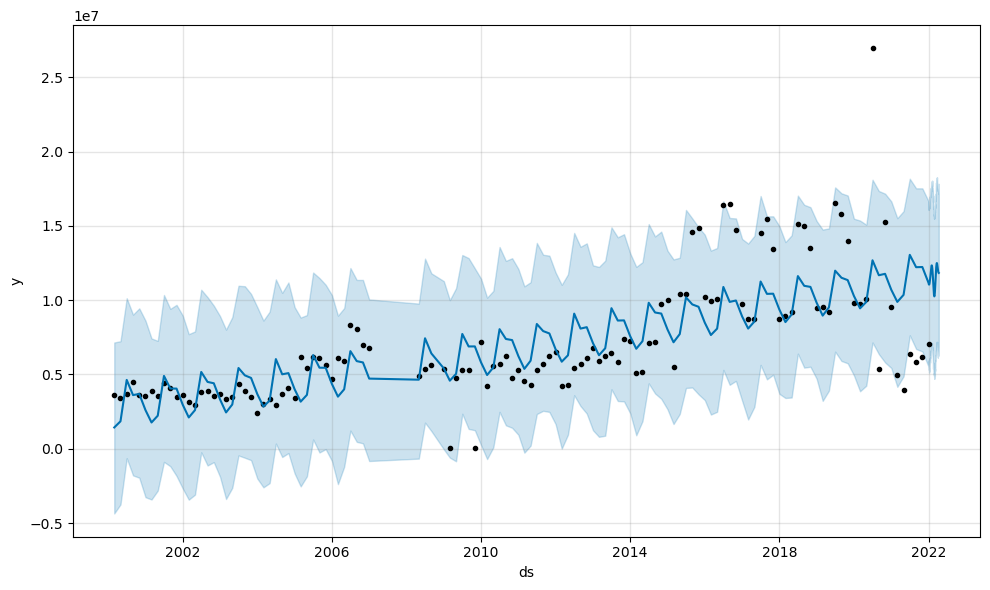

In [130]:
plot1 = m.plot(forecast)

Bu kod satırı, Prophet modelinin bileşenlerini (trend ve mevsimsel desenler gibi) gösteren bir grafik oluşturmak için kullanılır. plot_components metodu, modelin içsel bileşenlerini ayrı ayrı görselleştirmek için kullanılır.

Aşağıda, plt2 değişkeni üzerinden oluşturulan grafikle ilgili açıklamalar yer almaktadır:

m: Prophet modeli.
forecast: predict metodundan elde edilen tahmin sonuçları.
Oluşturulan bu grafik, genellikle üç ana bölümden oluşur:

Trend Bileşeni Grafiği: Zaman serisinin genel eğilimini gösterir. Bu, verinin zaman içindeki genel yükselme veya düşüş eğilimini ifade eder.

Haftalık Mevsimsel Desen Grafiği: Eğer daily_seasonality=True olarak ayarlandıysa, bu grafik haftanın günlerine göre mevsimsel deseni gösterir.

Yıllık Mevsimsel Desen Grafiği: Eğer yıllık mevsimsel desen varsa, bu bileşen yıllık periyottaki deseni gösterir.

Bu tür grafikler, zaman serisinin genel özelliklerini anlamak ve modelin bu özelliklere ne kadar uyduğunu değerlendirmek için kullanılır.

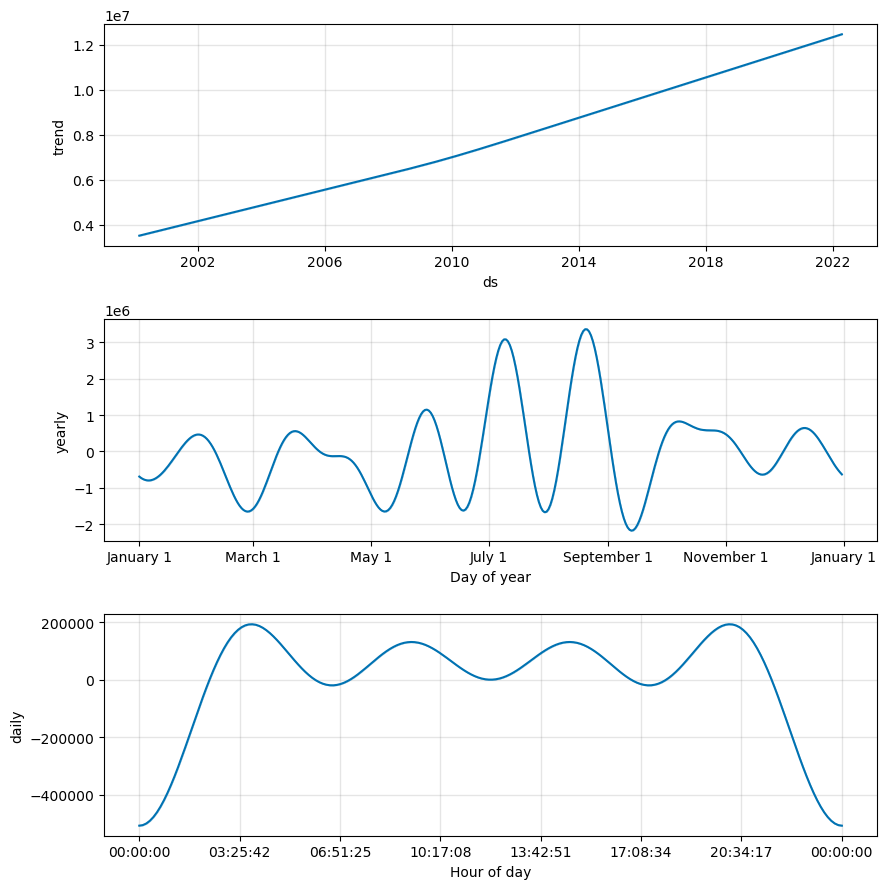

In [131]:
plt2 = m.plot_components(forecast)